1. Row_df 만들기
csv는 kaggle 출처

In [1]:
import pandas as pd

df1 = pd.read_csv('.\\dataset\\hate_speech_data.csv')
df2 = pd.read_csv('.\\dataset\\hate_speech_binary_dataset2.csv')
df1.drop('Unnamed: 0', inplace=True, axis=1)

df = pd.concat((df1, df2), ignore_index=True)
display(df.head(5))


,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


In [55]:
import sys
!{sys.executable} -m pip install pandas matplotlib scikit-learn python-pptx


  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 59.5 MB/s eta 0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df1 = pd.read_csv('.\\dataset\\hate_speech_data.csv')
df2 = pd.read_csv('.\\dataset\\hate_speech_binary_dataset2.csv')
df1.drop('Unnamed: 0', inplace=True, axis=1)

df = pd.concat((df1, df2), ignore_index=True)
display(df.head(5))


,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


2. 결측치 제거

In [4]:

df.dropna(axis=0, inplace=True)
df.isnull().sum(axis=0)
display(df.head(5))

,문장,혐오 여부
0,지금 어디 계세요?,0
1,한국 시간에 시계 맞췄어?,0
2,햄버거 두 개랑 콜라 주세요.,0
3,우리는 밤새 춤추고 노래했다.,0
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0


In [5]:
import numpy as np

count_data = []
for i in range(len(df)):
    count=0
    data = df.iloc[i, 0]
    
    for j in data:
        count+=1
    count_data.append(count)

count_data = np.array(count_data)
df['문자 개수'] = count_data

In [6]:
display(df.head(5))

,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


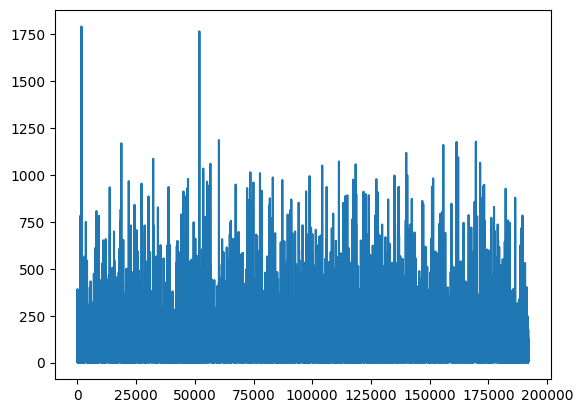

In [7]:
import matplotlib.pyplot as plt

plt.plot(df['문자 개수'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191995 entries, 0 to 191999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   문장      191995 non-null  object
 1   혐오 여부   191995 non-null  int64 
 2   문자 개수   191995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


2. 데이터 분포 비교
혐오 여부의 0과1 에대한 실제 계수와 비율 비교


In [9]:
zero = (df['혐오 여부'] == 0)
one = (df['혐오 여부'] == 1)
df_count = df.count()
zero_count = df.loc[zero, ['혐오 여부']].count()
zero_rate = zero_count / df_count

one_count = df.loc[one, ['혐오 여부']].count()
one_rate = one_count / df_count




display(zero_rate['혐오 여부'], one_rate['혐오 여부'])
display(zero_count['혐오 여부'], one_count['혐오 여부'])


np.float64(0.4739654678507253)

np.float64(0.5260345321492748)

np.int64(90999)

np.int64(100996)

In [10]:
df['문자 개수'].describe()

count    191995.000000
mean         39.172244
std          50.901776
min           1.000000
25%          15.000000
50%          26.000000
75%          44.000000
max        1791.000000
Name: 문자 개수, dtype: float64

3. 이상치 확인 및 제거

In [11]:
filt = df['문자 개수'] > 500

df[filt].count()

문장       369
혐오 여부    369
문자 개수    369
dtype: int64

In [12]:
df = df.drop(index=df[filt].index)
display(df.head(5), df.describe())

,문장,혐오 여부,문자 개수
0,지금 어디 계세요?,0,10
1,한국 시간에 시계 맞췄어?,0,14
2,햄버거 두 개랑 콜라 주세요.,0,16
3,우리는 밤새 춤추고 노래했다.,0,16
4,"무엇보다도, 스트레스를 줄이는 것이 중요합니다.",0,26


,혐오 여부,문자 개수
count,191626.000000,191626.000000
mean,0.527032,37.913154
std,0.499270,41.354690
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,500.000000


4. train/valid 나누기

In [13]:
all = df['문장'].count()
train_len = int(all*0.8)
train = df.iloc[0:train_len]
valid = df.iloc[train_len:]

display(train.tail(5), valid.head(5))

,문장,혐오 여부,문자 개수
153600,라이언 고슬링이 나온다는 이유로만 본 영화인데 이런 여운을 주다니...,1,39
153601,"시리즈의 기원이면서, 1편의 힘과 임팩트는 시리즈가 계속 굴러가게 만든 원동력.",1,44
153602,50년대에 이런 연출이 가능하다니 어떤 경지를 보는 것 같다. 시대를 역행한 작품,1,45
153603,당신은 지금 행복합니까,1,12
153604,"노래,춤이 잘 어우러지고..45년 전 영화라는게 안 믿기네요^o^",1,36


,문장,혐오 여부,문자 개수
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27
153606,진쨔 재밌어 요ㅠㅠㅠ 정말정말,1,16
153607,우연히 만날수있는 경우의수도 있어서 ㅁㅈㅎ,0,23
153608,과거(사연)는 필요없다. 있는 그대로 바라보면 될 뿐이다.,1,32
153609,얘 탈홍어임 아프리카 방송했을떄 봤는데 전향서쓴거 ㅇㅈ,0,30


In [14]:
display(train.describe(), valid.describe())

,혐오 여부,문자 개수
count,153300.000000,153300.000000
mean,0.527795,37.911409
std,0.499228,41.467011
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,500.000000


,혐오 여부,문자 개수
count,38326.000000,38326.000000
mean,0.523979,37.920133
std,0.499431,40.902871
min,0.000000,1.000000
25%,0.000000,15.000000
50%,1.000000,26.000000
75%,1.000000,44.000000
max,1.000000,498.000000


5. 모델의 입력 및 출력 고정
x축은 문장
y축은 혐오 여부

In [15]:
x = train['문장']
y = train['혐오 여부']

In [17]:
display(x.head(5))

0                    지금 어디 계세요?
1                한국 시간에 시계 맞췄어?
2              햄버거 두 개랑 콜라 주세요.
3              우리는 밤새 춤추고 노래했다.
4    무엇보다도, 스트레스를 줄이는 것이 중요합니다.
Name: 문장, dtype: object

6. 데이터 전처리
글자단위, 2~3글자, feature은 최대 5000

튜닝관점
1) char -> word
2) 2~3글자를 1~3글자로
3) feature을 10000로


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=5000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

print(y_train, y_valid)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5020955 stored elements and shape (153300, 5000)>
  Coords	Values
  (0, 137)	0.32490431238735995
  (0, 709)	0.2265202424762925
  (0, 711)	0.3400644279137172
  (0, 1854)	0.2910355489083161
  (0, 2500)	0.3469616837036967
  (0, 3281)	0.3210579317167811
  (0, 3594)	0.3317227276917165
  (0, 3837)	0.35941481393571917
  (0, 4558)	0.2776635059438522
  (0, 4559)	0.3209418282593541
  (1, 402)	0.2702648727451064
  (1, 627)	0.4028871467721073
  (1, 628)	0.30984390655798766
  (1, 1538)	0.33275693434422127
  (1, 1539)	0.34220015485109695
  (1, 1680)	0.3378161590049023
  (1, 1782)	0.248733046512833
  (1, 3351)	0.2768702666305311
  (1, 3688)	0.1448264722919965
  (1, 4837)	0.2489754837139619
  (1, 4838)	0.32434387143419263
  (2, 103)	0.20809625902382006
  (2, 341)	0.2754666330352413
  (2, 342)	0.3555866461634181
  (2, 956)	0.22288393852946672
  :	:
  (153299, 904)	0.13758507432767847
  (153299, 905)	0.23493435101463092
  (153299, 1208)	0.090

7. 분류기 학습
TF-IDF로 수치화된 문장 벡터를 이용해 실제로 “혐오냐 아니냐”를 예측하는 분류 모델을 학습
선형 SVM(LinearSVC) 를 사용

In [17]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))

valid accuracy: 0.9306997860460262
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18244
           1       0.94      0.93      0.93     20082

    accuracy                           0.93     38326
   macro avg       0.93      0.93      0.93     38326
weighted avg       0.93      0.93      0.93     38326



8. 모델 평가

8-1. 틀린행만 모으기
모델이 틀린 문장, 정답, 모델에 대한 답이 나옴

In [18]:
import pandas as pd

# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

display(wrong_df.head(20))


,문장,혐오 여부,문자 개수,y_true,y_pred
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27,1,0
153638,니콜라스 홀트 잘생겼다,1,12,1,0
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153671,나도 미국쪽에서 취소시켰다고 생각했음.,0,21,0,1
153678,태세전환...,0,7,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153696,푸른아이는 전설이었따,1,11,1,0
153718,우마서먼......... 오,1,15,1,0
153739,... ㅎㅎ,0,6,0,1


8-2. 혐오(1)인데 모델 예측 (0)
놓친 케이스

In [19]:
miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
display(miss_hate.head(20))



,문장,혐오 여부,문자 개수,y_true,y_pred
153605,명대사 어떤상황에서도 자존심은 잃지마라 (김주승),1,27,1,0
153638,니콜라스 홀트 잘생겼다,1,12,1,0
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153696,푸른아이는 전설이었따,1,11,1,0
153718,우마서먼......... 오,1,15,1,0
153767,굿,1,1,1,0
153815,굿,1,1,1,0
153824,에라모르렜다 자폭이다 낄낄,1,14,1,0
153857,평식이 지나 그리고 다은이 이것 셋은 좀 모자라거나 눈이 사시임이 분명.,1,40,1,0


8-3. 혐오 아닌데(0) 모델 예측(1) 
과검출

In [20]:
false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
display(false_hate.head(20))


,문장,혐오 여부,문자 개수,y_true,y_pred
153671,나도 미국쪽에서 취소시켰다고 생각했음.,0,21,0,1
153678,태세전환...,0,7,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1
153827,조심히 가시길,0,7,0,1
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,40,0,1
153833,언급할 가치도 없는 쓰레기급,0,15,0,1


In [21]:
print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

문장        2656
혐오 여부     2656
문자 개수     2656
y_true    2656
y_pred    2656
dtype: int64 

 문장        1494
혐오 여부     1494
문자 개수     1494
y_true    1494
y_pred    1494
dtype: int64 

 문장        1162
혐오 여부     1162
문자 개수     1162
y_true    1162
y_pred    1162
dtype: int64


9. 튜닝
feature 확장과 n-gram 하한 조정이 성능 향상에 기여

9-1. Default

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=5000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))



# 예측이랑 정답이 다른 위치 찾기
wrong_mask = y_valid != y_pred

# valid DF에서 그 행들만 뽑기
wrong_df = valid.loc[wrong_mask].copy()

# 예측값도 같이 보고 싶으니까 컬럼으로 붙이기
wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9306997860460262
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18244
           1       0.94      0.93      0.93     20082

    accuracy                           0.93     38326
   macro avg       0.93      0.93      0.93     38326
weighted avg       0.93      0.93      0.93     38326

문장        2656
혐오 여부     2656
문자 개수     2656
y_true    2656
y_pred    2656
dtype: int64 

 문장        1494
혐오 여부     1494
문자 개수     1494
y_true    1494
y_pred    1494
dtype: int64 

 문장        1162
혐오 여부     1162
문자 개수     1162
y_true    1162
y_pred    1162
dtype: int64


9-2. feature 5000 => 500000


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(2,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))




wrong_mask = y_valid != y_pred


wrong_df = valid.loc[wrong_mask].copy()


wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9535824244638105
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18244
           1       0.96      0.95      0.96     20082

    accuracy                           0.95     38326
   macro avg       0.95      0.95      0.95     38326
weighted avg       0.95      0.95      0.95     38326

문장        1779
혐오 여부     1779
문자 개수     1779
y_true    1779
y_pred    1779
dtype: int64 

 문장        951
혐오 여부     951
문자 개수     951
y_true    951
y_pred    951
dtype: int64 

 문장        828
혐오 여부     828
문자 개수     828
y_true    828
y_pred    828
dtype: int64


9-3. range(2,3) => range(1,3) + feature
1,4이상 시도했으나 악화

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(1,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC()
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))




wrong_mask = y_valid != y_pred


wrong_df = valid.loc[wrong_mask].copy()

wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9575744925116109
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     18244
           1       0.96      0.96      0.96     20082

    accuracy                           0.96     38326
   macro avg       0.96      0.96      0.96     38326
weighted avg       0.96      0.96      0.96     38326

문장        1626
혐오 여부     1626
문자 개수     1626
y_true    1626
y_pred    1626
dtype: int64 

 문장        803
혐오 여부     803
문자 개수     803
y_true    803
y_pred    803
dtype: int64 

 문장        823
혐오 여부     823
문자 개수     823
y_true    823
y_pred    823
dtype: int64


10. 다양한 feature 실험

최고점수: 50만
부담 적은 설정: 20만

20만 이상시 성능이 포화되는 경향

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

feature_sizes = [50_000, 100_000, 200_000, 300_000, 500_000]

results = []

for max_f in feature_sizes:
    print(f"\n=== max_features = {max_f} ===")
    vec = TfidfVectorizer(
        analyzer='char',
        ngram_range=(1, 3),   
        max_features=max_f,
    )
    # train에만 fit
    vec.fit(train['문장'])
    X_tr = vec.transform(train['문장'])
    X_va = vec.transform(valid['문장'])

    clf = LinearSVC()
    clf.fit(X_tr, train['혐오 여부'])

    y_pred = clf.predict(X_va)

    acc = accuracy_score(valid['혐오 여부'], y_pred)
    print("valid accuracy:", acc)

    # 필요하면 주석 풀어서 클래스별도 보기
    # print(classification_report(valid['혐오 여부'], y_pred))

    results.append((max_f, acc))

print("\n--- 요약 ---")
for max_f, acc in results:
    print(max_f, acc)



=== max_features = 50000 ===
valid accuracy: 0.953973803684183

=== max_features = 100000 ===
valid accuracy: 0.9556436883577728

=== max_features = 200000 ===
valid accuracy: 0.9568961018629651

=== max_features = 300000 ===
valid accuracy: 0.9572874810833377

=== max_features = 500000 ===
valid accuracy: 0.9575744925116109

--- 요약 ---
50000 0.953973803684183
100000 0.9556436883577728
200000 0.9568961018629651
300000 0.9572874810833377
500000 0.9575744925116109


,max_features,valid_accuracy
0,50000,0.953974
1,100000,0.955644
2,200000,0.956896
3,300000,0.957287
4,500000,0.957574


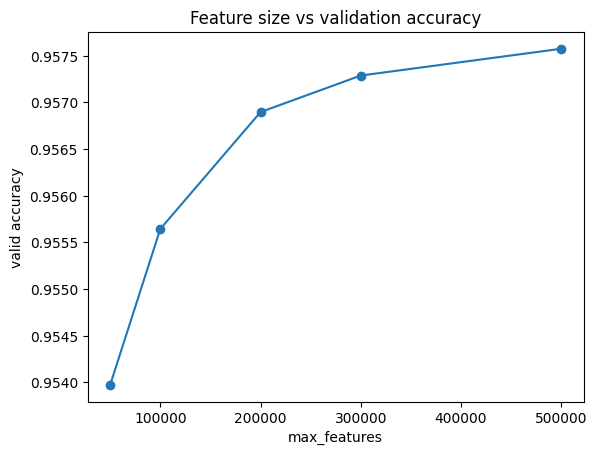

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 네가 얻은 결과 그대로 넣기
data = {
    "max_features": [50_000, 100_000, 200_000, 300_000, 500_000],
    "valid_accuracy": [0.9539738, 0.9556436, 0.9568961, 0.9572875, 0.9575745],
}

df_perf = pd.DataFrame(data)
display(df_perf)

# 그래프
plt.figure()
plt.plot(df_perf["max_features"], df_perf["valid_accuracy"], marker="o")
plt.xlabel("max_features")
plt.ylabel("valid accuracy")
plt.title("Feature size vs validation accuracy")
plt.show()


11. 가중치 변경
클래스 1(혐오)에 대해 class_weight를 1.0 → 1.2로 높였을 때, 전체 정확도는 0.9569 → 0.9560으로 소폭 감소했으나, 혐오 클래스의 재현율은 0.9617까지 개선되었다. 따라서 운영 시 ‘혐오 누락 최소화’가 목표라면 1.1~1.2 구간이 타협점이다.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


vec = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=200_000,   
)
vec.fit(train['문장'])
X_tr = vec.transform(train['문장'])
X_va = vec.transform(valid['문장'])

y_tr = train['혐오 여부']
y_va = valid['혐오 여부']

weights_to_try = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
reports = {}

for w in weights_to_try:
    clf = LinearSVC(class_weight={0:1.0, 1:w})
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_va)
    acc = accuracy_score(y_va, y_pred)

    print(f"{w=}, acc={acc:.4f}")
    reports[w] = classification_report(y_va, y_pred, digits=4)


w=1.0, acc=0.9569
w=1.1, acc=0.9565
w=1.2, acc=0.9560
w=1.3, acc=0.9559
w=1.4, acc=0.9557
w=1.5, acc=0.9556
w=2.0, acc=0.9550


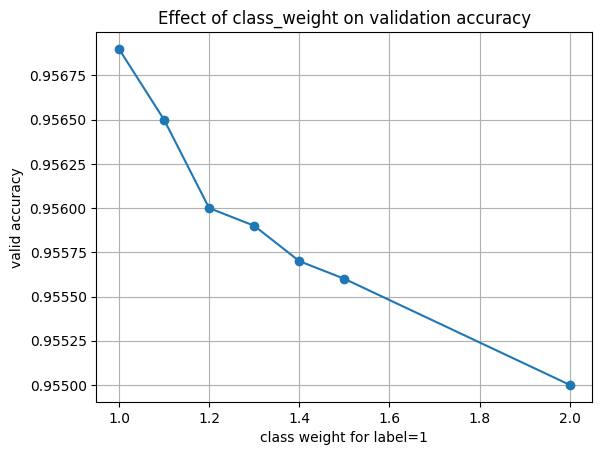

In [38]:
import matplotlib.pyplot as plt

# class weight vs accuracy (from your run)
weights = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
accs = [0.9569, 0.9565, 0.9560, 0.9559, 0.9557, 0.9556, 0.9550]

plt.figure()
plt.plot(weights, accs, marker="o")
plt.xlabel("class weight for label=1")
plt.ylabel("valid accuracy")
plt.title("Effect of class_weight on validation accuracy")
plt.grid(True)
plt.show()


12. v1_final

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

char_vectorizer = TfidfVectorizer(
    analyzer='char',   # 글자 단위
    ngram_range=(1,3), # 2~3글자 조합
    max_features=500000,
)


char_vectorizer.fit(train['문장'])
x_train_char = char_vectorizer.transform(train['문장'])
x_valid_char = char_vectorizer.transform(valid['문장'])

# print(x_train_char, x_valid_char)


y_train = train['혐오 여부']
y_valid = valid['혐오 여부']

# print(y_train, y_valid)



clf = LinearSVC(class_weight={0: 1.0, 1: 1.2})
clf.fit(x_train_char, y_train)


y_pred = clf.predict(x_valid_char)

acc = accuracy_score(y_valid, y_pred)

print("valid accuracy:", acc)

print(classification_report(y_valid, y_pred))




wrong_mask = y_valid != y_pred


wrong_df = valid.loc[wrong_mask].copy()


wrong_df['y_true'] = y_valid[wrong_mask]
wrong_df['y_pred'] = y_pred[wrong_mask]

# display(wrong_df.head(20))


miss_hate = wrong_df[(wrong_df['y_true'] == 1) & (wrong_df['y_pred'] == 0)]
# display(miss_hate.head(20))

false_hate = wrong_df[(wrong_df['y_true'] == 0) & (wrong_df['y_pred'] == 1)]
# display(false_hate.head(20))

print(wrong_df.count(), '\n\n',miss_hate.count(), '\n\n',false_hate.count())

valid accuracy: 0.9572874810833377
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     18244
           1       0.96      0.96      0.96     20082

    accuracy                           0.96     38326
   macro avg       0.96      0.96      0.96     38326
weighted avg       0.96      0.96      0.96     38326

문장        1637
혐오 여부     1637
문자 개수     1637
y_true    1637
y_pred    1637
dtype: int64 

 문장        756
혐오 여부     756
문자 개수     756
y_true    756
y_pred    756
dtype: int64 

 문장        881
혐오 여부     881
문자 개수     881
y_true    881
y_pred    881
dtype: int64


In [28]:
display(false_hate.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,135,0,1
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153748,하이바쓰지그랬어 ?아마몰랐을꺼야 ... 근대신고는왜허니 ? 심심하니?,0,38,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153788,천사,0,2,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,40,0,1
153839,귀가...,0,5,0,1


In [29]:
display(wrong_df.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,135,0,1
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,18,0,1
153739,... ㅎㅎ,0,6,0,1
153748,하이바쓰지그랬어 ?아마몰랐을꺼야 ... 근대신고는왜허니 ? 심심하니?,0,38,0,1
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,44,0,1
153769,내가젤조아하는사유리다!,0,12,0,1
153788,천사,0,2,0,1
153792,아..아쉽슙뉘돠..,0,10,0,1


In [30]:
display(miss_hate.head(20))

,문장,혐오 여부,문자 개수,y_true,y_pred
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,15,1,0
153657,ㅋㅋㅋ 성폭행 라호범,1,11,1,0
153824,에라모르렜다 자폭이다 낄낄,1,14,1,0
153906,두려움에만 떨고있으면 아무것도 변하지 않아,1,23,1,0
153976,오우 형래형님 나오신거네,1,13,1,0
153987,샤를리즈 테론의 몸매가 죽이는데,1,17,1,0
154014,이 나라 지켜주셔서 정말 감사합니다..,1,21,1,0
154018,목소리도 이상한데 쾌걸조로리때매 주는거임,1,22,1,0
154030,쉴새없이 웃기네 ㅋㅋㅋㅋ 틈을 안주네 틈을 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,42,1,0
154047,ㅋㅋ 영화제목이 자아임 게다가 2분 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,34,1,0


v2_start

13. 임계값 기반 의사결정 레이어
기본값(0.0): precision 0.9564, recall 0.9624, F1 0.9594로 전체적으로 가장 균형적이다. 모델의 기본 예측으로 채택할 수 있다.
누락 최소화 모드(-0.1): 임계값을 약간 낮추면 recall이 0.9719까지 올라가며 혐오 문장을 더 많이 포착한다. 이때 precision은 0.9457로 소폭 감소한다. “혐오를 놓치지 않는 것”이 우선이라면 이 구간이 적합하다.
오탐 최소화 모드(0.3): 임계값을 올리면 precision이 0.9793까지 상승해 ‘혐오라고 표시된 것’의 신뢰도가 높아진다. 다만 recall이 0.9256으로 내려가므로 일부 혐오 문장은 걸러지지 않을 수 있다.

In [31]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


scores = clf.decision_function(x_valid_char)  # shape: (n_samples,)

# 2) 여러 임계값을 정의한다
thresholds = np.linspace(-1.0, 1.0, 21)  # -1.0 ~ 1.0 사이를 0.1 간격으로 예시

results = []

for th in thresholds:
    # 3) 임계값 적용해서 예측 라벨 만들기
    #    score >= th 이면 1로 본다
    y_pred_th = (scores >= th).astype(int)

    # 4) 지표 계산
    prec = precision_score(y_valid, y_pred_th, zero_division=0)
    rec = recall_score(y_valid, y_pred_th, zero_division=0)
    f1 = f1_score(y_valid, y_pred_th, zero_division=0)

    results.append((th, prec, rec, f1))

print("th\tprecision\trecall\tf1")
for th, p, r, f1 in results:
    print(f"{th:.2f}\t{p:.4f}\t\t{r:.4f}\t{f1:.4f}")


th	precision	recall	f1
-1.00	0.7644		0.9985	0.8659
-0.90	0.7883		0.9979	0.8808
-0.80	0.8121		0.9970	0.8951
-0.70	0.8375		0.9959	0.9099
-0.60	0.8613		0.9939	0.9229
-0.50	0.8843		0.9910	0.9346
-0.40	0.9033		0.9875	0.9435
-0.30	0.9194		0.9829	0.9501
-0.20	0.9332		0.9783	0.9552
-0.10	0.9457		0.9719	0.9586
0.00	0.9564		0.9624	0.9594
0.10	0.9657		0.9526	0.9591
0.20	0.9735		0.9398	0.9564
0.30	0.9793		0.9256	0.9517
0.40	0.9840		0.9087	0.9449
0.50	0.9875		0.8880	0.9351
0.60	0.9905		0.8655	0.9238
0.70	0.9930		0.8393	0.9097
0.80	0.9945		0.8118	0.8939
0.90	0.9960		0.7814	0.8757
1.00	0.9970		0.7487	0.8552


여기서부터는 수동리라벨링을 위한 코드

14. 에러사례 대표 뽑기

In [32]:
# 대표로 볼 개수
TOP_K = 10

# 혐오인데 모델이 0으로 본 경우 (missed hate)
miss_sample = miss_hate[['문장', 'y_true', 'y_pred', '문자 개수']].head(TOP_K)

# 혐오 아닌데 모델이 1로 본 경우 (false alarm)
false_sample = false_hate[['문장', 'y_true', 'y_pred', '문자 개수']].head(TOP_K)

display(miss_sample)
display(false_sample)



,문장,y_true,y_pred,문자 개수
153650,아 내가 다행복하넹ㅋㅋㅋㅋㅋ,1,0,15
153657,ㅋㅋㅋ 성폭행 라호범,1,0,11
153824,에라모르렜다 자폭이다 낄낄,1,0,14
153906,두려움에만 떨고있으면 아무것도 변하지 않아,1,0,23
153976,오우 형래형님 나오신거네,1,0,13
153987,샤를리즈 테론의 몸매가 죽이는데,1,0,17
154014,이 나라 지켜주셔서 정말 감사합니다..,1,0,21
154018,목소리도 이상한데 쾌걸조로리때매 주는거임,1,0,22
154030,쉴새없이 웃기네 ㅋㅋㅋㅋ 틈을 안주네 틈을 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,0,42
154047,ㅋㅋ 영화제목이 자아임 게다가 2분 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1,0,34


,문장,y_true,y_pred,문자 개수
153610,"이 사람, 재능기부로 어려운 학생들도 많이 도와주고 좋은 일은 많이 한 걸로 안다....",0,1,135
153694,"아항, 바로 이해가 되네...ㅣㅣ",0,1,18
153739,... ㅎㅎ,0,1,6
153748,하이바쓰지그랬어 ?아마몰랐을꺼야 ... 근대신고는왜허니 ? 심심하니?,0,1,38
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,1,44
153769,내가젤조아하는사유리다!,0,1,12
153788,천사,0,1,2
153792,아..아쉽슙뉘돠..,0,1,10
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,1,40
153839,귀가...,0,1,5


In [33]:
SHORT_LEN = 10

miss_short = miss_hate[miss_hate['문자 개수'] <= SHORT_LEN].head(TOP_K)
false_short = false_hate[false_hate['문자 개수'] <= SHORT_LEN].head(TOP_K)

print("=== missed short hate ===")
display(miss_short[['문장', '문자 개수']])

print("=== false short hate ===")
display(false_short[['문장', '문자 개수']])


=== missed short hate ===


,문장,문자 개수
154191,벨마와다프네,6
154280,h,1
154607,하나경 존경스럽다.,10
154748,제밋긴하네,5
154827,ㅋㅋㅋㅋㅋㅋㅋㅋ,8
154839,꽤 인기 많았잖아,9
154919,하,1
155461,개구쟁이 스머프,8
155882,쨔앙,2
156212,Leo ioi,7


=== false short hate ===


,문장,문자 개수
153739,... ㅎㅎ,6
153788,천사,2
153792,아..아쉽슙뉘돠..,10
153839,귀가...,5
153983,허허허허,4
153985,와 ㅋㅋ금연욕구..,10
154067,구와악,3
154074,데드풀,3
154244,후~,2
154431,영혼이 살아있네,8


In [34]:
miss_hate.to_csv("miss_hate_full.csv", index=False)
false_hate.to_csv("false_hate_full.csv", index=False)

# 대표만
miss_sample.to_csv("miss_hate_top10.csv", index=False)
false_sample.to_csv("false_hate_top10.csv", index=False)


,max_features,valid_accuracy
0,50000,0.953974
1,100000,0.955644
2,200000,0.956896
3,300000,0.957287
4,500000,0.957574


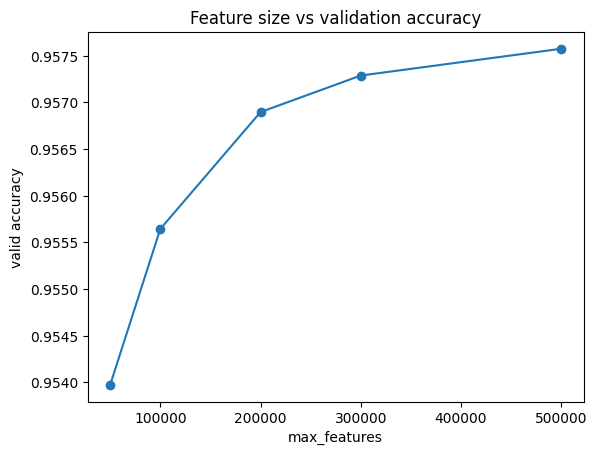

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 네가 얻은 결과 그대로 넣기
data = {
    "max_features": [50_000, 100_000, 200_000, 300_000, 500_000],
    "valid_accuracy": [0.9539738, 0.9556436, 0.9568961, 0.9572875, 0.9575745],
}

df_perf = pd.DataFrame(data)
display(df_perf)

# 그래프
plt.figure()
plt.plot(df_perf["max_features"], df_perf["valid_accuracy"], marker="o")
plt.xlabel("max_features")
plt.ylabel("valid accuracy")
plt.title("Feature size vs validation accuracy")
plt.show()


15. 라벨 노이즈 후보 뽑기
검증 단계에서 모델은 0으로 라벨링된 문장들 중 일부를 일관되게 1로 예측했다. 이 중 비속어·성범죄·집단 비하 관련 키워드를 포함한 샘플만 별도로 추출하여 label_noise_candidates.csv로 저장했다. 이 집합은 원천 라벨 오류 가능성이 높으므로 수동 재라벨링 대상로 분류한다.

In [39]:
import pandas as pd

# 1) 너가 앞에서 만든 false_hate 그대로 사용
#    (정답 0인데 모델이 1로 본 애들)
candidates = false_hate.copy()

# 2) 위험/공격성 있는 키워드 목록
# 필요하면 더 추가
noise_keywords = [
    "성폭행", "강간", "쓰레기", "병신", "미친", "씨발", "시발", "좆", "ㅈ같",
    "개새", "개새끼", "짱깨", "쪽바리", "틀딱", "꼰대", "벌레", "충",
]

# 3) 키워드가 하나라도 들어간 행만 필터
mask = candidates["문장"].apply(
    lambda x: any(kw in str(x) for kw in noise_keywords)
)
noise_df = candidates[mask].copy()

# 4) 보기 좋게 필요한 컬럼만
noise_df = noise_df[["문장", "혐오 여부", "y_pred", "문자 개수"]]

display(noise_df.head(30))
print("노이즈 후보 개수:", len(noise_df))

# 5) 파일로 저장해서 사람이 다시 볼 수 있게
noise_df.to_csv("label_noise_candidates.csv", index=False)


,문장,혐오 여부,y_pred,문자 개수
153749,부와 명예를 누릴 수 있음에도 시골에서 의사...\r\n\r\n이부분에서 충격받았다..,0,1,44
153831,언젠가부터 좋은 아름다운 정의 착한 이런 단어들이 좆같은 의미로 다가온다,0,1,40
155435,진화충들이 또,0,1,7
156143,@만나면조언충고 오랜만에 봤는데 박지윤은 리스트에 없네요,0,1,31
156227,장동건은 흥행외에 커미션이 있나보다 항상 좆같은 영화드라마만 찍어대니,0,1,38
158631,별 좆같은 영화를 다 만드네,0,1,15
160839,'대통령을 위한 물리학' 에서 세계적 물리학자 리처드 뮬러는 이렇게 말한다.\r\n...,0,1,417
161860,야이 개새끼들아 저기 made*** 나다!!,0,1,24
165976,저 작품은 깨지니깐 더 가치있노 ㅋㅋ\r\n일베는 쓰레기라며 무참히 짓밟아 버리는 ...,0,1,73
169457,개새끼_문재인을 바라보는 포항여고 여고생들의 미소는 진짜가 아닌 것 같음 ㅎㅎ,0,1,43


노이즈 후보 개수: 30


16.타 모델 실험
같은 입력 벡터(char TF-IDF, ngram (1,3), max_features=200,000)를 사용하여 두 가지 선형 분류기를 비교했다.

LinearSVC

valid accuracy: 0.9560

혐오(1) recall: 0.9617

혐오(1) f1: 0.9582

Logistic Regression

valid accuracy: 0.9522

혐오(1) recall: 0.9586

혐오(1) f1: 0.9546

두 모델 모두 성능은 안정적이지만, LinearSVC가 약 0.4%p 정도 더 높은 전체 정확도와 f1을 보여 v2 기준 기본 분류기로 채택할 수 있다. 로지스틱 회귀는 해석 가능성이 필요하거나, 환경상 SVM을 쓰기 어려운 경우의 백업 모델로 둘 수 있다.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1) 벡터는 v2에서 잘 먹던 설정 그대로
vec = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=200_000,
)
vec.fit(train['문장'])
X_tr = vec.transform(train['문장'])
X_va = vec.transform(valid['문장'])

y_tr = train['혐오 여부']
y_va = valid['혐오 여부']

results = {}

# 2) 모델 1: LinearSVC (기준)
svc = LinearSVC(class_weight={0: 1.0, 1: 1.2})
svc.fit(X_tr, y_tr)
y_pred_svc = svc.predict(X_va)
acc_svc = accuracy_score(y_va, y_pred_svc)
results['LinearSVC'] = acc_svc
print("=== LinearSVC ===")
print("acc:", acc_svc)
print(classification_report(y_va, y_pred_svc, digits=4))

# 3) 모델 2: Logistic Regression
#    liblinear / saga 둘 다 TF-IDF 희소행렬에 많이 씀
logit = LogisticRegression(
    max_iter=200,
    class_weight={0: 1.0, 1: 1.2},
    n_jobs=-1,
)
logit.fit(X_tr, y_tr)
y_pred_logit = logit.predict(X_va)
acc_logit = accuracy_score(y_va, y_pred_logit)
results['LogisticRegression'] = acc_logit
print("\n=== LogisticRegression ===")
print("acc:", acc_logit)
print(classification_report(y_va, y_pred_logit, digits=4))

print("\n=== summary ===")
for name, acc in results.items():
    print(name, acc)


=== LinearSVC ===
acc: 0.9560089756301205
              precision    recall  f1-score   support

           0     0.9575    0.9498    0.9536     18244
           1     0.9547    0.9617    0.9582     20082

    accuracy                         0.9560     38326
   macro avg     0.9561    0.9557    0.9559     38326
weighted avg     0.9560    0.9560    0.9560     38326


=== LogisticRegression ===
acc: 0.952199551218494
              precision    recall  f1-score   support

           0     0.9540    0.9451    0.9496     18244
           1     0.9506    0.9586    0.9546     20082

    accuracy                         0.9522     38326
   macro avg     0.9523    0.9519    0.9521     38326
weighted avg     0.9522    0.9522    0.9522     38326


=== summary ===
LinearSVC 0.9560089756301205
LogisticRegression 0.952199551218494


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# 1) 최종 세트 학습 (예: 500,000짜리로)
vec_final = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=500_000,   # 너가 점수 제일 잘 나온 거
)
vec_final.fit(train['문장'])

X_tr_final = vec_final.transform(train['문장'])
X_va_final = vec_final.transform(valid['문장'])

y_tr = train['혐오 여부']
y_va = valid['혐오 여부']

clf_final = LinearSVC(class_weight={0: 1.0, 1: 1.2})
clf_final.fit(X_tr_final, y_tr)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 1.0, 1: 1.2}"
,verbose,0
,random_state,None


In [45]:
def predict_hate(texts, threshold=0.0):
    # 단일 문장도 받게 처리
    if isinstance(texts, str):
        texts = [texts]

    # 벡터화는 반드시 vec_final로
    X = vec_final.transform(texts)

    # 점수/라벨
    scores = clf_final.decision_function(X)
    labels = (scores >= threshold).astype(int)

    results = []
    for t, s, y in zip(texts, scores, labels):
        results.append({
            "text": t,
            "score": float(s),
            "label": int(y),
        })
    return results


In [48]:
import re

MERGE_PATTERNS = [
    (r"병신\s+", "병신"),
    (r"개\s+새끼", "개새끼"),
    (r"씨\s*발", "씨발"),
    (r"좆\s+같", "좆같"),
    (r"ㅈ\s+같", "ㅈ같"),
    (r"쓰레기\s+", "쓰레기"),
]

def normalize_hate_text(text: str) -> str:
    t = text
    for pat, repl in MERGE_PATTERNS:
        t = re.sub(pat, repl, t, flags=re.IGNORECASE)
    return t


def predict_hate(texts, threshold=0.0):
    if isinstance(texts, str):
        texts = [texts]

    # 🔥 여기서 욕 패턴 먼저 붙인다
    norm_texts = [normalize_hate_text(t) for t in texts]

    X = vec_final.transform(norm_texts)
    scores = clf_final.decision_function(X)
    labels = (scores >= threshold).astype(int)

    return [
        {"text": t, "norm_text": nt, "score": float(s), "label": int(y)}
        for t, nt, s, y in zip(texts, norm_texts, scores, labels)
    ]


In [49]:
# 테스트용 예시 문장들
samples_positive_like = [
    "진짜 병신 같아",
    "씨 발 왜 저러냐",
    "개 새끼 또 시작이네",
    "좆 같아서 못 보겠다",
    "저거 하는 꼴이 딱 틀딱이네",
    "저 인간은 사람을 무시하네",
    "그년 진짜 선 넘었다",
    "또 저런 쓰레기냐",
    "이런 미친 소리를 하냐",
    "꼰대짓 그만해라",
]

samples_ambiguous = [
    "또 태세 전환하네…",
    "아쉽네 진짜",
    "... ㅎㅎ",
    "저 사람 왜 저럴까",
    "조심히 가세요",
    "말투가 좀 그런데 그래도 봐줄 만함",
]

samples_negative_like = [
    "이 영화 진짜 감동이네요",
    "오늘도 좋은 하루 되세요",
    "정보 감사합니다!",
    "이 부분 설명 좀 더 부탁드려요",
    "다음 편도 기대하고 있습니다",
]

# 한 번에 합치기
all_samples = (
    samples_positive_like
    + samples_ambiguous
    + samples_negative_like
)

# 우리가 앞에서 만든 predict_hate()를 그대로 쓴다
results = predict_hate(all_samples, threshold=0.0)

for r in results:
    print(f"text: {r['text']}")
    # 전처리된 텍스트도 보고 싶으면 이렇게 (위에서 norm_text까지 넣어놨다면)
    if "norm_text" in r:
        print(f"norm : {r['norm_text']}")
    print(f"score: {r['score']:.4f}, label: {r['label']}")
    print("-" * 40)


text: 진짜 병신 같아
norm : 진짜 병신같아
score: -1.5824, label: 0
----------------------------------------
text: 씨 발 왜 저러냐
norm : 씨발 왜 저러냐
score: -3.2862, label: 0
----------------------------------------
text: 개 새끼 또 시작이네
norm : 개새끼 또 시작이네
score: -2.1620, label: 0
----------------------------------------
text: 좆 같아서 못 보겠다
norm : 좆같아서 못 보겠다
score: -0.5314, label: 0
----------------------------------------
text: 저거 하는 꼴이 딱 틀딱이네
norm : 저거 하는 꼴이 딱 틀딱이네
score: -2.7179, label: 0
----------------------------------------
text: 저 인간은 사람을 무시하네
norm : 저 인간은 사람을 무시하네
score: -0.6871, label: 0
----------------------------------------
text: 그년 진짜 선 넘었다
norm : 그년 진짜 선 넘었다
score: -0.7795, label: 0
----------------------------------------
text: 또 저런 쓰레기냐
norm : 또 저런 쓰레기냐
score: -1.4079, label: 0
----------------------------------------
text: 이런 미친 소리를 하냐
norm : 이런 미친 소리를 하냐
score: -0.8644, label: 0
----------------------------------------
text: 꼰대짓 그만해라
norm : 꼰대짓 그만해라
score: -0.8106, label: 0
-------------------

In [51]:
!pip install pptx

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pptx (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pptx


In [58]:
from pptx import Presentation
import os

prs = Presentation()

# 1. 제목 슬라이드
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "한국어 욕설 탐지 프로젝트"
slide.placeholders[1].text = "Char TF-IDF + LinearSVC + Hard-case 라운드"

# 2. 프로젝트 개요
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "1. 프로젝트 개요"
body = slide.placeholders[1].text_frame
body.text = "목표: 한국어 문장을 욕설/비욕설로 분류"
p = body.add_paragraph()
p.text = "threshold로 검열 강도 조절 가능"
p.level = 1
p = body.add_paragraph()
p.text = "logs 기반으로 hard case를 수집해서 다시 학습"
p.level = 1

# 3. 데이터 구성
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "2. 데이터 구성"
body = slide.placeholders[1].text_frame
body.text = "./dataset/hate_speech_data.csv"
p = body.add_paragraph()
p.text = "./dataset/hate_speech_binary_dataset2.csv"
p.level = 1
p = body.add_paragraph()
p.text = "결측 제거, 500자 초과 제거, 컬럼 통일(문장/혐오 여부)"
p.level = 1
p = body.add_paragraph()
p.text = "data.tsv는 구조만 열어두고 필요 시 포함"
p.level = 1

# 4. 모델링
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "3. 모델링"
body = slide.placeholders[1].text_frame
body.text = "벡터화: TfidfVectorizer"
p = body.add_paragraph()
p.text = "analyzer='char', ngram_range=(1,3), max_features=500000"
p.level = 1
p = body.add_paragraph()
p.text = "분류기: LinearSVC(class_weight={0:1.0, 1:1.2})"
p.level = 1
p = body.add_paragraph()
p.text = "char 단위로 철자 변형된 욕설에 대응"
p.level = 1

# 5. Hard-case 라운드 학습
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "4. Hard-case 라운드 학습"
body = slide.placeholders[1].text_frame
body.text = "라운드마다 train/valid를 다시 나눔 (seed 42~45)"
p = body.add_paragraph()
p.text = "valid에서 틀린 샘플만 ./logs/ 폴더에 CSV로 저장"
p.level = 1
p = body.add_paragraph()
p.text = "그중 원래 1인데 0으로 간 것만 다음 라운드에 재주입"
p.level = 1
p = body.add_paragraph()
p.text = "→ 욕을 놓치는 비율을 점진적으로 줄이는 구조"
p.level = 1

# 6. 추론 & threshold
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "5. 추론 & 임계값"
body = slide.placeholders[1].text_frame
body.text = "predict.py에서 모델/벡터 로드 후 decision score 사용"
p = body.add_paragraph()
p.text = "score < threshold → 욕설 / score ≥ threshold → 비욕설"
p.level = 1
p = body.add_paragraph()
p.text = "threshold 낮추면 민감 / 높이면 보수 → 운영환경별 조정"
p.level = 1

# 7. 산출물 구조
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "6. 산출물 구조"
body = slide.placeholders[1].text_frame
body.text = "./models/  : 최종 vec, LinearSVC"
p = body.add_paragraph()
p.text = "./logs/    : 라운드별 hard case CSV"
p.level = 1
p = body.add_paragraph()
p.text = "train.py / predict.py : 재학습·추론 스크립트"
p.level = 1

# 8. 확장 계획
slide = prs.slides.add_slide(prs.slide_layouts[1])
slide.shapes.title.text = "7. 확장"
body = slide.placeholders[1].text_frame
body.text = "1) tsv 대용량 로그 포함"
p = body.add_paragraph()
p.text = "2) hard_false_* 수동 라벨링 후 재학습"
p.level = 1
p = body.add_paragraph()
p.text = "3) 유해표현 문서 기반 멀티라벨로 확장"
p.level = 1

# 저장 경로 (현재 폴더에 저장)
save_path = os.path.join(os.getcwd(), "korean_hate_speech_project.pptx")
prs.save(save_path)
print("saved to", save_path)


saved to c:\Users\pw710\OneDrive\Documents\GitHub\ko-toxic-multilabel\korean_hate_speech_project.pptx
